In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, load_wine
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor as SklearnDecisionTreeRegressor
from decision_tree_regressor import DecisionTreeRegressor


#load the dataset

In [3]:
# Load the datasets
datasets = {
    'iris': load_iris(),
    'wine': load_wine()
}


# Initialize models
models = {
    'Custom Decision Tree Regressor': DecisionTreeRegressor(max_depth=3),
    'Scikit-Learn Decision Tree Regressor': SklearnDecisionTreeRegressor(max_depth=3, random_state=42)
}


### train and test the models

In [4]:

results = {}
for dataset_name, dataset in datasets.items():
    X, y = dataset.data, dataset.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    results[dataset_name] = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        if len(y_test.shape) == 1:
            y_test = y_test.reshape(-1, 1)
        if len(y_pred.shape) == 1:
            y_pred = y_pred.reshape(-1, 1)
        
        # Calculate mean squared error for each output separately
        mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
        
        # Average the mean squared errors across outputs
        avg_mse = np.mean(mse)
        results[dataset_name][model_name] = avg_mse

print(results)



{'iris': {'Custom Decision Tree Regressor': 0.05026527905315784, 'Scikit-Learn Decision Tree Regressor': 0.005820834608713395}, 'wine': {'Custom Decision Tree Regressor': 0.14656179082116022, 'Scikit-Learn Decision Tree Regressor': 0.14656179082116022}}


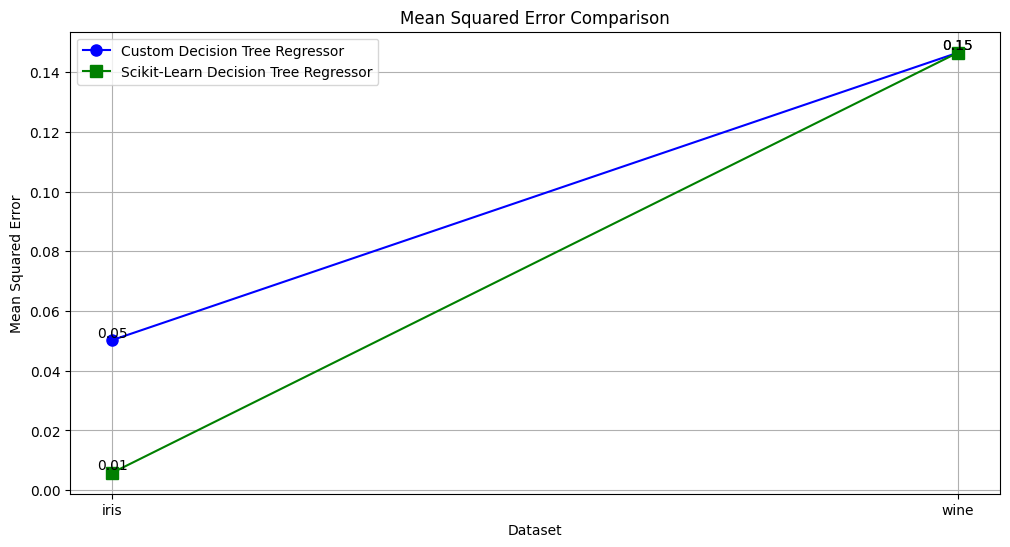

In [5]:
# Concatenate the results from different datasets
all_results = {}
for dataset_name, dataset_results in results.items():
    for model_name, mse in dataset_results.items():
        if model_name not in all_results:
            all_results[model_name] = {}
        all_results[model_name][dataset_name] = mse

# Plotting the results
fig, ax = plt.subplots(figsize=(12, 6))
markers = ['o', 's', '^']
for i, (model_name, dataset_results) in enumerate(all_results.items()):
    x_values = list(range(len(datasets)))
    y_values = [dataset_results[dataset_name] for dataset_name in datasets.keys()]
    if model_name == 'Custom Decision Tree Regressor':
        ax.plot(x_values, y_values, marker=markers[i % len(markers)], markersize=8, label=f'{model_name}', color='blue')
    else:
        ax.plot(x_values, y_values, marker=markers[i % len(markers)], markersize=8, label=f'{model_name}', color='green')
    for j, (x, y) in enumerate(zip(x_values, y_values)):
        ax.text(x, y, f'{y:.2f}', ha='center', va='bottom')
ax.set_xticks(range(len(datasets)))
ax.set_xticklabels(datasets.keys())
ax.set_xlabel('Dataset')
ax.set_ylabel('Mean Squared Error')
ax.legend()
plt.title('Mean Squared Error Comparison')
plt.grid(True)
plt.show()
